# Single FID Example

This example shows an overview of the basic functionality of the Blackchirp python module. It uses data acquired using the UC Davis Ka band (26.5 - 40 GHz) CP-FTMW spectrometer.

To get started, first ensure that the module has been installed with `pip install blackchirp`. It is recommended to import the main blackchirp classes with `from blackchirp import *`. The cell below is configured to import from the development version of the module if this example notebook is run from the blackchirp source directory.


In [1]:
from blackchirp.src.blackchirp import * # replace with from blackchirp import *
from matplotlib import pyplot as plt

## Loading and Inspecting an Experiment

In this example, we will use a CP-FTMW spectrum of methyl tert-butyl ether, which is assumed to be in the directory `example-data/mtbe`. This directory contains the contents of the Blackchirp data, which was copied from the original data storage location.

In [2]:
ll example-data/mtbe/

total 40
-rw-r--r-- 1 kncrabtree 1110 Jun  4 16:42 auxdata.csv
-rw-r--r-- 1 kncrabtree  663 Jun  4 16:42 chirps.csv
-rw-r--r-- 1 kncrabtree  127 Jun  4 16:42 clocks.csv
drwxr-xr-x 2 kncrabtree 4096 Jun  4 16:42 fid/
-rw-r--r-- 1 kncrabtree  118 Jun  4 16:42 hardware.csv
-rw-r--r-- 1 kncrabtree 7285 Jun  4 16:42 header.csv
-rw-r--r-- 1 kncrabtree  183 Jun  4 16:42 log.csv
-rw-r--r-- 1 kncrabtree   27 Jun  4 16:42 objectives.csv
-rw-r--r-- 1 kncrabtree  118 Jun  4 16:42 version.csv


The `BCExperiment` class is used to read in these files and construct python objects for them. Since all Blackchirp data is written in CSV format, the files are read in using `pandas.read_csv` and are available as pandas `DataFrame` objects with the same name as the corresponding CSV file. To load an experiment, pass the appropriate path to `BCExperiment`. This path should be the folder which contains the `version.csv` file for the desired experiment. Once loaded, the contents of the csv files may be inspected easily. Here we show the header.

In [3]:
exp = BCExperiment('./example-data/mtbe/')

exp.header

,ObjKey,ArrayKey,ArrayIndex,ValueKey,Value,Units
0,ChirpConfig,,<NA>,ChirpInterval,20,μs
1,ChirpConfig,,<NA>,PostGate,-0.17,μs
2,ChirpConfig,,<NA>,PostProtection,0.15,μs
3,ChirpConfig,,<NA>,PreGate,0.5,μs
4,ChirpConfig,,<NA>,PreProtection,0.1,μs
...,...,...,...,...,...,...
176,RfConfig,,<NA>,CommonUpDownLO,false,
177,RfConfig,,<NA>,DownconversionSideband,LowerSideband,
178,RfConfig,,<NA>,ShotsPerClockConfig,0,
179,RfConfig,,<NA>,TargetSweeps,1,


Just like in the `header.csv` file itself, each entry is associated with an `ObjKey` and a `ValueKey`, and in some cases also an `ArrayKey` and `ArrayIndex`. The combination of these 4 values can be used to select any particular row, as shown in more detail below. Each entry has a `Value` and `Units` associated with it.

For such a large DataFrame, Jupyter notebooks typically compress the output. To get a brief overview of what information is available, use the `BCExperiment.header_unique_keys()` function, which returns a set containing the unique keys in the table.

In [4]:
exp.header_unique_keys?

Signature: exp.header_unique_keys() -> 'set[str]'
Docstring:
Fetch all unique ObjKeys in experiment header

Returns:
    List of unique header keys
File:      ~/github/blackchirp/src/python/blackchirp/src/blackchirp/blackchirpexperiment.py
Type:      method

In [5]:
exp.header_unique_keys()

{'ChirpConfig',
 'Experiment',
 'FtmwConfig',
 'FtmwDigitizer.0',
 'PulseGenerator.0',
 'PulseGenerator.1',
 'RfConfig'}

To view only data associated with one of these keys, use the `BCExperiment.header_rows()` function:

In [6]:
exp.header_rows?

Signature:
exp.header_rows(
    objKey: 'str' = None,
    valKey: 'str' = None,
    arrKey: 'str' = None,
) -> 'pd.DataFrame'
Docstring:
Fetch rows from the header file matching conditions

Filters rows in the header according to ObjKey, ValueKey, and ArrayKey.
Any combination of these (or none) may be specified to filter.

Args:
    objKey: Object key in header
    valKey: Value key in header
    arrKey: Array key in header

Returns:
    DataFrame with matching wors
File:      ~/github/blackchirp/src/python/blackchirp/src/blackchirp/blackchirpexperiment.py
Type:      method

For instance, to obtain only the settings related to the Pulse Generator:

In [7]:
exp.header_rows('PulseGenerator.0')

,ObjKey,ArrayKey,ArrayIndex,ValueKey,Value,Units
48,PulseGenerator.0,,<NA>,PulseGenEnabled,true,
49,PulseGenerator.0,,<NA>,PulseGenMode,Triggered_Rising,
50,PulseGenerator.0,,<NA>,RepRate,5,Hz
51,PulseGenerator.0,Channel,0,ActiveLevel,ActiveHigh,
52,PulseGenerator.0,Channel,0,Delay,0,μs
...,...,...,...,...,...,...
126,PulseGenerator.0,Channel,7,Mode,Normal,
127,PulseGenerator.0,Channel,7,Name,Ch8,
128,PulseGenerator.0,Channel,7,Role,None,
129,PulseGenerator.0,Channel,7,SyncChannel,0,


To see only the pulse widths:

In [8]:
exp.header_rows('PulseGenerator.0','Width')

,ObjKey,ArrayKey,ArrayIndex,ValueKey,Value,Units
60,PulseGenerator.0,Channel,0,Width,650,μs
70,PulseGenerator.0,Channel,1,Width,150,μs
80,PulseGenerator.0,Channel,2,Width,20,μs
90,PulseGenerator.0,Channel,3,Width,2.019,μs
100,PulseGenerator.0,Channel,4,Width,1,μs
110,PulseGenerator.0,Channel,5,Width,1,μs
120,PulseGenerator.0,Channel,6,Width,1,μs
130,PulseGenerator.0,Channel,7,Width,1,μs


And finally, the `BCExperiment.header_value()` function retrieves one particular value from the table. A corresponding `BCExperiment.header_unit()` function can be used to retrieve the unit, if desired. Note that the value is returned as a string, so it may need to be explicitly cast to an `int` or `float` if the value will be used in a calculation.

In [9]:
exp.header_value?

Signature:
exp.header_value(
    objKey: 'str',
    valKey: 'str',
    idx: 'int' = 0,
    arrKey: 'str' = None,
) -> 'str'
Docstring:
Fetch one value from header

The objKey and valKey (and arrKey, if specified) are used to filter the header.
Then the idx value is used to determine which row to return. If a match is not
found, an empty string is returned

Args:
    objKey: Object key in header
    valKey: Value key in header
    idx: Row number to return (optional)
    arrKey: Array key in header (optional)

Returns:
    Matching value or empty string
File:      ~/github/blackchirp/src/python/blackchirp/src/blackchirp/blackchirpexperiment.py
Type:      method

In [10]:
exp.header_value('PulseGenerator.0','Width',3),exp.header_unit('PulseGenerator.0','Width',3)

('2.019', 'μs')

Other csv files are similarly accessible.

In [11]:
exp.chirps

,Chirp,Segment,StartMHz,EndMHz,DurationUs,Alpha,Empty
0,0,0,4895,1520,2,-1687.5,False
1,1,0,4895,1520,2,-1687.5,False
2,2,0,4895,1520,2,-1687.5,False
3,3,0,4895,1520,2,-1687.5,False
4,4,0,4895,1520,2,-1687.5,False
5,5,0,4895,1520,2,-1687.5,False
6,6,0,4895,1520,2,-1687.5,False
7,7,0,4895,1520,2,-1687.5,False
8,8,0,4895,1520,2,-1687.5,False
9,9,0,4895,1520,2,-1687.5,False


## FID data and Fourier Transforms

The CP-FTMW data for an experiment are stored in a BCFTMW object which is accessible as `BCExperiment.ftmw`. This object can be used to view data about the available FIDs and load them from disk. For a single FID acquisition like this, the FID is loaded with `BCFTMW.get_fid()`, which returns a `BCFid` object. The `BCFID.ft()` method computes the Fourier transform of that FID. As a quick example:

(26500.0, 40000.0)

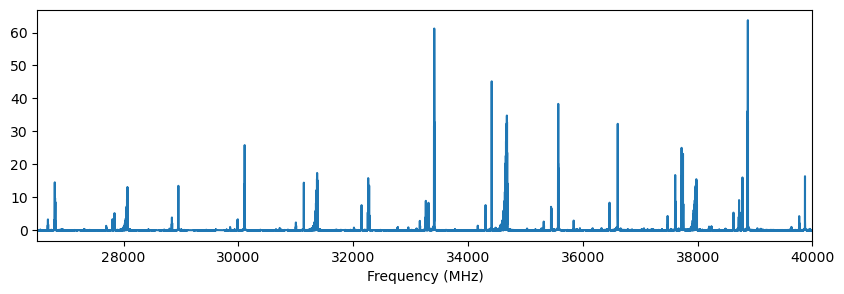

In [12]:
x,y = exp.ftmw.get_fid().ft()

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(x,y)
ax.set_xlabel('Frequency (MHz)')
ax.set_xlim(26500,40000)

Taking a step back, the FID itself can be stored and visualized. The FID itself has `BCFid.y()` and `BCFid.xy()` methods which return arrays containing the FID data in units of V, and in the latter case, also the time array in units of s. For this FID, the chirp takes place from roughly 0.75 - 3.75 μs.

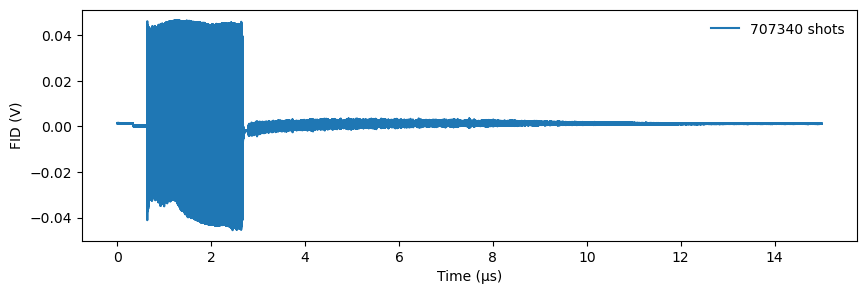

In [13]:
fid = exp.ftmw.get_fid()

fidx, fidy = fid.xy()
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(fidx*1e6,fidy,label=f'{int(fid.shots)} shots')
ax.set_xlabel('Time (μs)')
ax.set_ylabel('FID (V)')
ax.legend(frameon=False)

At this point it is important to note that `fidy` is a 2D numpy array. The second axis corresponds to the frame number. In this acquisition, there is only 1 frame, but for an acquisition configured with multiple records this number may be larger. A single frame can then be selected by slicing (e.g., `fidy[:,3]`).

In [14]:
fidy.shape

(750000, 1)

The contents of the `fidparams.csv` file are available as an attribute of the `BCFTMW` object.

In [15]:
exp.ftmw.fidparams

,spacing,probefreq,vmult,shots,sideband,size
index,,,,,,
0,2.000000e-11,40960,0.000002,707340,LowerSideband,750000
1,2.000000e-11,40960,0.000002,89820,LowerSideband,750000
2,2.000000e-11,40960,0.000002,179840,LowerSideband,750000
3,2.000000e-11,40960,0.000002,269840,LowerSideband,750000
4,2.000000e-11,40960,0.000002,359860,LowerSideband,750000
5,2.000000e-11,40960,0.000002,449860,LowerSideband,750000
6,2.000000e-11,40960,0.000002,539860,LowerSideband,750000
7,2.000000e-11,40960,0.000002,629860,LowerSideband,750000


This experiment contains 2 FIDs: FID 0 is the final set of data and FID 1 was a backup that was taken 15 minutes into the acquisition. The `BCFTMW.get_fid()` function takes an optional argument that specifies the FID number to retrieve. We can therefore access the backup version with `get_fid(1)`. The code below loads the backup and plots its FT together with the total, showing the decrease in noise level with increasing shots.

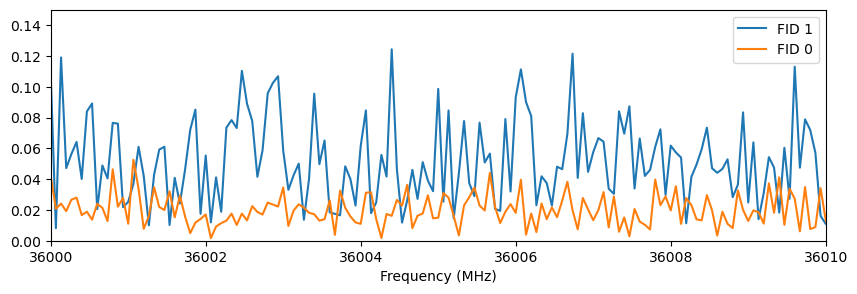

In [16]:
x2,y2 = exp.ftmw.get_fid(1).ft()
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(x2,y2,label='FID 1')
ax.plot(x,y,label='FID 0')
ax.set_xlabel('Frequency (MHz)')
ax.set_xlim(36000,36010)
ax.set_ylim(0,0.15)
ax.legend()

The `BCFid.ft()` function also allows for customizing the FID processing options like those in the Blackchirp program itself. The default values are read in from `processing.csv`, which is converted into a python dictionary named `proc` which is an attribute of `BCFTMW`. One notable difference in behavior: in the python module, points within "AutoscaleMHz" of the probe frequency are set to 0 to accommodate automatic autoscaling of the plot, while in Blackchirp itself those points are still shown but are not included when computing the vertical range of the FT.

In [17]:
exp.ftmw.proc

{'AutoscaleIgnoreMHz': '250',
 'FidEndUs': '15',
 'FidExpfUs': '0',
 'FidRemoveDC': 'false',
 'FidStartUs': '3.35',
 'FidWindowFunction': 'None',
 'FidZeroPadFactor': '0',
 'FtUnits': '6'}

The `BCFid.ft()` function allows for any of these settings to be overridden.

In [18]:
fid.ft?

Signature:
fid.ft(
    *,
    start_us: 'float' = None,
    end_us: 'float' = None,
    winf: 'str' = None,
    zpf: 'int' = None,
    rdc: 'bool' = None,
    expf_us: 'float' = None,
    autoscale_MHz: 'float' = None,
    units_power: 'int' = None,
    frame: 'int' = None,
) -> 'tuple[np.ndarray, np.ndarray]'
Docstring:
Compute the Fourier transform of the FID

By default, this computes the FT for each frame in the FID using the settings
stored in the proc dictionary. This behavior can be overridden by specifying
any combination of the keyword arguments.

Args:
    start_us: Starting time, in μs. Points at earlier times are set to 0.
    end_us: Ending time, in μs. Points at later times are set to 0.
    winf: Window function applied to points between start and end.
        This is passed directly to `scipy.signal.get_window <https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html>`_.
    zpf: Zero-padding factor (positive integer). If nonzero, the FID is
   

For example, to apply an exponential filter and compare with the original data:

Text(0.5, 0, 'Frequency (MHz)')

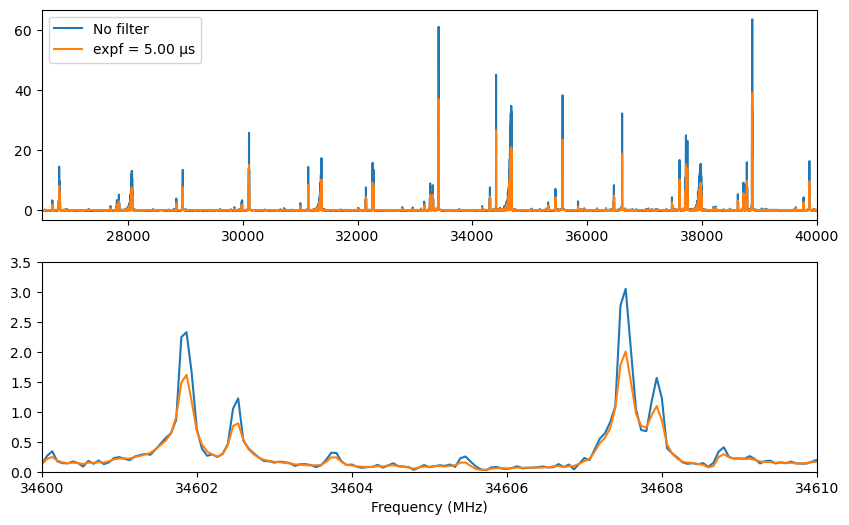

In [19]:
expf = 5.0
x3,y3 = exp.ftmw.get_fid().ft(expf_us=expf)

fig,axes = plt.subplots(2,1,figsize=(10,6))
for ax in axes:
    ax.plot(x,y,label='No filter')
    ax.plot(x3,y3,label=f'expf = {expf:.2f} μs')
axes[0].set_xlim(26500,40000)
axes[1].set_xlim(34600,34610)
axes[1].set_ylim(0,3.5)
axes[0].legend()
axes[1].set_xlabel('Frequency (MHz)')

A greater variety of window functions is available in the Python module compared with Blackchirp. The `winf` parameter can be set to any value supported by [scipy.signal.get_window](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html). For example, a generalized Gaussian window with variable p and σ parameters can be used by passing a tuple with the window name and parameter values:

Text(0.5, 0, 'Frequency (MHz)')

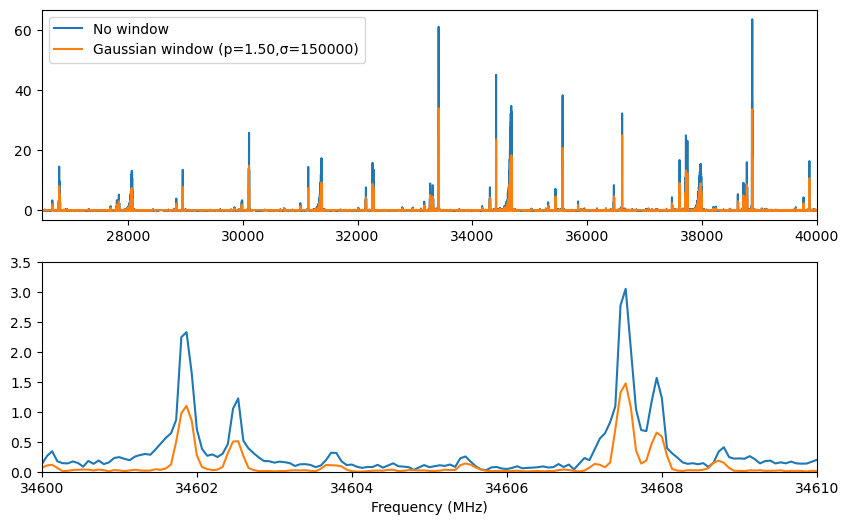

In [20]:
p = 1.5
sigma = len(fid)//5
x4,y4 = fid.ft(winf=('general_gaussian',p,sigma))

fig,axes = plt.subplots(2,1,figsize=(10,6))
for ax in axes:
    ax.plot(x,y,label='No window')
    ax.plot(x4,y4,label=f'Gaussian window (p={p:.2f},σ={int(sigma)})')
axes[0].set_xlim(26500,40000)
axes[1].set_xlim(34600,34610)
axes[1].set_ylim(0,3.5)
axes[0].legend()
axes[1].set_xlabel('Frequency (MHz)')

Like the FID, the FT y array is 2-dimensional, where the second axis corresponds to the frame number. By default, the FT is applied to all frames at once; if only a single frame is desired, pass its index as the `frame` parameter.

In [21]:
y.shape

(375001, 1)